## Сводные таблицы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Сводные таблицы "вручную"

In [4]:
titanic.groupby('sex')[['survived']].sum()

,survived
sex,
female,233
male,109


In [5]:
titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [6]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [7]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Синтаксис сводных таблиц

In [8]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
# titanic.pivot_table?
# values : column to aggregate, optional
# index : column, Grouper, array, or list of the previous

#     If an array is passed, it must be the same length as the data. The
#     list can contain any of the other types (except list).
#     Keys to group by on the pivot table index.  If an array is passed,
#     it is being used as the same manner as column values.

# columns : column, Grouper, array, or list of the previous

#     If an array is passed, it must be the same length as the data. The
#     list can contain any of the other types (except list).
#     Keys to group by on the pivot table column.  If an array is passed,
#     it is being used as the same manner as column values.

# aggfunc : function, list of functions, dict, default numpy.mean✌

#     If list of functions passed, the resulting pivot table will have
#     hierarchical columns whose top level are the function names
#     (inferred from the function objects themselves)
#     If dict is passed, the key is column to aggregate and value
#     is function or list of functions.

# fill_value : scalar, default None

#     Value to replace missing values with (in the resulting pivot table,
#     after aggregation).

# margins : bool, default False

#     Add all row / columns (e.g. for subtotal / grand totals).

# dropna : bool, default True

#     Do not include columns whose entries are all NaN.

# margins_name : str, default 'All'

#     Name of the row / column that will contain the totals
#     when margins is True.

# observed : bool, default False

#     This only applies if any of the groupers are Categoricals.
#     If True: only show observed values for categorical groupers.
#     If False: show all values for categorical groupers.

#     .. versionchanged:: 0.25.0

# sort : bool, default True

#     Specifies if the result should be sorted.

In [10]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


#### Многоуровневые сводные таблицы
    возраст в качестве третьего измерения

In [11]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [12]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [13]:
# pd.cut?

In [14]:
titanic.pivot_table('survived', ['sex', 'age'], 'class')

class         First  Second  Third
sex    age                        
female 0.75     NaN     NaN   1.00
       1.00     NaN     NaN   1.00
       2.00     0.0     1.0   0.25
       3.00     NaN     1.0   0.00
       4.00     NaN     1.0   1.00
...             ...     ...    ...
male   70.00    0.0     0.0    NaN
       70.50    NaN     NaN   0.00
       71.00    0.0     NaN    NaN
       74.00    NaN     NaN   0.00
       80.00    1.0     NaN    NaN

[145 rows x 3 columns]

In [15]:
# автоматическое вычисление квантилий
fare = pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [16]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Дополнительные параметры сводных таблиц

In [17]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare': 'mean'})
# первый параметр values пропущен, т.к. при задании aggfunc происходит его автоматическое определение

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [18]:
# итоги по каждой группе margins=True
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [19]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, aggfunc=sum)

class,First,Second,Third,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [20]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=sum)

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


### Пример: данные о рождаемости

In [22]:
birth = pd.read_csv('data/births.csv')
birth

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [23]:
# Добавим столбец для десятилетия
birth['decade'] = 10 * (birth['year'] // 10)
birth

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [26]:
birth.pivot_table('births', index='decade', columns='gender', aggfunc=sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

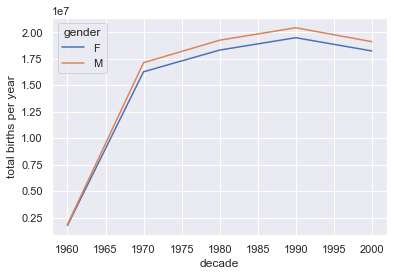

In [28]:
import matplotlib.pyplot as plt
sns.set()  # используем стили библиотеки seaborn
birth.pivot_table('births', index='decade', columns='gender', aggfunc=sum).plot()
plt.ylabel('total births per year')

Text(0, 0.5, 'total births per year')

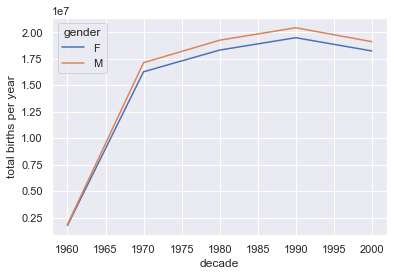

In [29]:
%matplotlib inline # один хрен
sns.set()  # используем стили библиотеки seaborn
birth.pivot_table('births', index='decade', columns='gender', aggfunc=sum).plot()
plt.ylabel('total births per year')

###### Дальнейшее исследование данных.
    Отсечь аномальные данные можно при помощи аглогиртма:
    
# сигма-отсечения (sigma-clipping)
Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем (см. ниже).

Например, фраза «90-й процентиль массы тела у новорожденных мальчиков составляет 4 кг» означает, что 90 % мальчиков рождаются с весом, меньшим либо равным 4 кг, а 10 % мальчиков рождаются с весом, большим либо равным 4 кг.

0,25-квантиль называется первым (или нижним) кварти́лем (от лат. quarta — четверть);
0,5-квантиль называется медианой (от лат. mediāna — середина) или вторым кварти́лем;
0,75-квантиль называется третьим (или верхним) кварти́лем.

Интеркварти́льным размахом (англ. Interquartile range) называется разность между третьим и первым квартилями, то есть 
x_0,75-x_0,25. Интерквартильный размах является характеристикой разброса распределения величины и является робастным аналогом дисперсии. Вместе, медиана и интерквартильный размах могут быть использованы вместо математического ожидания и дисперсии в случае распределений с большими выбросами, либо при невозможности вычисления последних.

95-й прецентиль — это такое число, что 95% элементов массива меньше или равны этому числу.

Короче так мы убираем всплески.

In [30]:
quartiles = np.percentile(birth['births'], [20, 50, 75])
quartiles

array([4262. , 4814. , 5289.5])

In [31]:
mu = quartiles[1]
mu
# т.е. мы взяли 50 процентиль = 4814.0
# и предположили, что все норм значения должны входить в размах +-760.35
# а остальные выбросили... на мой взгляд это очень грубо

4814.0

In [32]:
# грубая оценка среднего значения выборки в котором 0.74 - Межквартильный размах Гауссового распределения.
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

760.35

In [33]:
# для фильтрации строк, в которых кол-во новорожденных выходит за пределы этих значений, используем метод .query 
birth = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
birth

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [34]:
# установим целочисленный тип для столбца day
# изначально он был строчным из-за пустых значений
birth['day'] = birth['day'].astype(int)

C:\Users\Admin\AppData\Local\Temp/ipykernel_5176/3933919233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth['day'] = birth['day'].astype(int)


In [35]:
birth.dtypes

year       int64
month      int64
day        int32
gender    object
births     int64
decade     int64
dtype: object

In [36]:
# мы можем создать индекс для этих дат, объединив день, месяц и год
birth.index = pd.to_datetime(10000 * birth.year + 
                             100 * birth.month +
                             birth.day, format='%Y%m%d')
birth

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980
1988-12-30,1988,12,30,F,5742,1980
1988-12-30,1988,12,30,M,6095,1980
1988-12-31,1988,12,31,F,4435,1980


In [37]:
birth['day_of_week'] = birth.index.dayofweek
birth

C:\Users\Admin\AppData\Local\Temp/ipykernel_5176/2502938730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth['day_of_week'] = birth.index.dayofweek


,year,month,day,gender,births,decade,day_of_week
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


In [38]:
import matplotlib as mpl

Text(0, 0.5, 'mean birth by day')

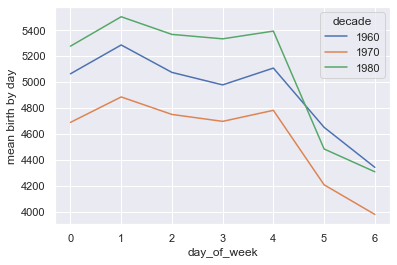

In [39]:
birth.pivot_table('births', index='day_of_week', columns='decade', aggfunc='mean').plot()
# plt.gca().set_xticklabels([1,2,3,4,5,6,7])
plt.ylabel('mean birth by day')

C:\Users\Admin\AppData\Local\Temp/ipykernel_5176/152063366.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([0,1,2,3,4,5,6,7])


Text(0, 0.5, 'mean birth by day')

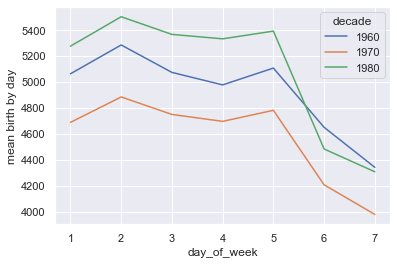

In [41]:
birth.pivot_table('births', index='day_of_week', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels([0,1,2,3,4,5,6,7])
plt.ylabel('mean birth by day')

    В зависимости от дня года:

In [42]:
# сначала сгруппируем данные отдельно по месяцу и дню
birth_by_date = birth.pivot_table('births', [birth.index.month, birth.index.day])
birth_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [43]:
# преобразуем этот мультииндекс в даты, связав их с фиктивным високосным годом.
birth_by_date.index = [pd.datetime(2012, month, day) 
                       for (month, day) in birth_by_date.index]
birth_by_date

C:\Users\Admin\AppData\Local\Temp/ipykernel_5176/1902077255.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birth_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


<AxesSubplot:>

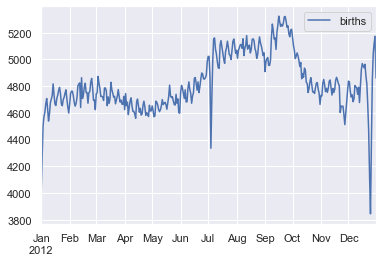

In [44]:
# fig, ax = plt.subplots(figsize=(12,4))
birth_by_date.plot()

<AxesSubplot:>

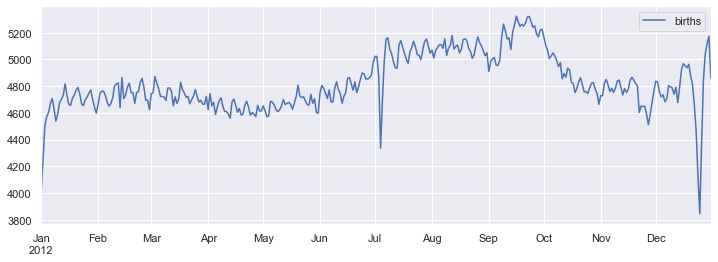

In [45]:
fig, ax = plt.subplots(figsize=(12,4))
birth_by_date.plot(ax=ax)